In [37]:
! git clone https://github.com/Naga-Manohar-Y/Classifying_Chessmen.git

Cloning into 'Classifying_Chessmen'...
remote: Enumerating objects: 569, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 569 (delta 0), reused 0 (delta 0), pack-reused 566 (from 2)
Receiving objects: 100% (569/569), 57.35 MiB | 55.35 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [1]:
!pip install numpy==1.22.4

  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [2]:
!pip install scipy

  Using cached scipy-1.13.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

2025-01-05 23:40:57.633810: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


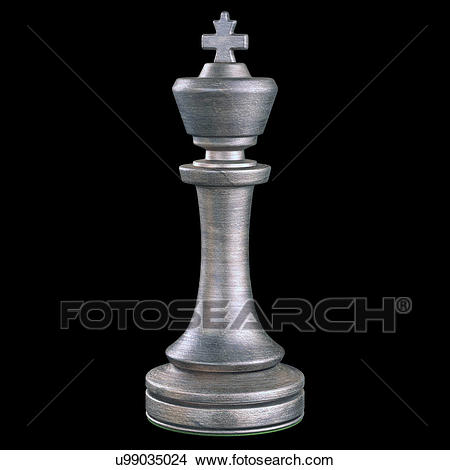

In [2]:
path = 'Classifying_Chessmen/Chessmen_Images_Data/King'
name = '00000015.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

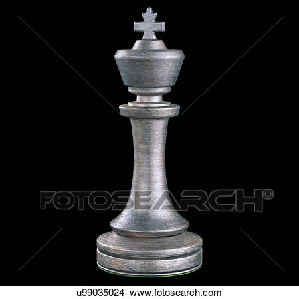

In [3]:
img = load_img(fullname, target_size=(299, 299))
img

### Xception

In [4]:
import numpy as np
import scipy
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [8]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [10]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 0s 24ms/step


In [11]:
decode_predictions(pred)

[[('n02667093', 'abaya', 0.06791395),
  ('n03729826', 'matchstick', 0.03853073),
  ('n04418357', 'theater_curtain', 0.035138644),
  ('n03045698', 'cloak', 0.0271922),
  ('n01930112', 'nematode', 0.022439124)]]

## Loading the dataset

In [12]:
DATA_DIR = 'Classifying_Chessmen/Chessmen_Images_Data'
image_size = (150, 150)
batch_size = 32

In [13]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='training'  # Get the training data
)

# Validation data
val_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation'  # Get the validation data
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


## EDA

In [14]:
train_ds.class_indices

{'Bishop': 0, 'King': 1, 'Knight': 2, 'Pawn': 3, 'Queen': 4, 'Rook': 5}

In [15]:
X, y = next(train_ds)
y[:5]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

## Xception Model Training

In [98]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(6)(vectors)

model = keras.Model(inputs, outputs)

In [99]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [100]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
14/14 [==============================] - 12s 673ms/step - loss: 2.0191 - accuracy: 0.3891 - val_loss: 0.7664 - val_accuracy: 0.6972
Epoch 2/10
14/14 [==============================] - 7s 495ms/step - loss: 0.8290 - accuracy: 0.7217 - val_loss: 0.7915 - val_accuracy: 0.7064
Epoch 3/10
14/14 [==============================] - 7s 500ms/step - loss: 0.4081 - accuracy: 0.8416 - val_loss: 0.7940 - val_accuracy: 0.6881
Epoch 4/10
14/14 [==============================] - 7s 488ms/step - loss: 0.2375 - accuracy: 0.9163 - val_loss: 0.8094 - val_accuracy: 0.7339
Epoch 5/10
14/14 [==============================] - 7s 493ms/step - loss: 0.1665 - accuracy: 0.9615 - val_loss: 0.7520 - val_accuracy: 0.7064
Epoch 6/10
14/14 [==============================] - 7s 505ms/step - loss: 0.1003 - accuracy: 0.9842 - val_loss: 0.6325 - val_accuracy: 0.7890
Epoch 7/10
14/14 [==============================] - 7s 512ms/step - loss: 0.0649 - accuracy: 1.0000 - val_loss: 0.6558 - val_accuracy: 0.7706
Epoch

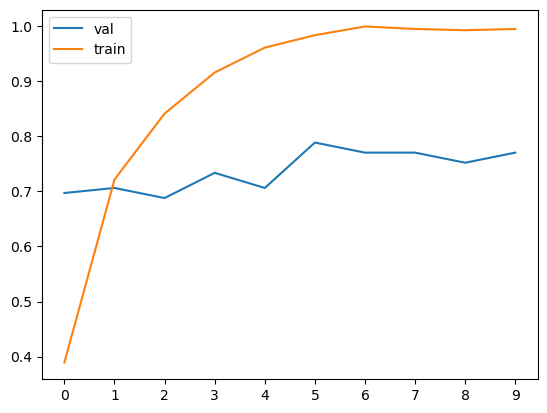

In [102]:
plt.plot(history.history['val_accuracy'], label='val')
plt.plot(history.history['accuracy'], label='train')

plt.xticks(np.arange(10))
plt.legend()

### Parameter tuning
### Adjusting the learning rate

In [104]:
def x_make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [105]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    xception_model = x_make_model(learning_rate=lr)
    history = xception_model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
14/14 [==============================] - 11s 607ms/step - loss: 1.9133 - accuracy: 0.2172 - val_loss: 1.7888 - val_accuracy: 0.2018
Epoch 2/10
14/14 [==============================] - 7s 477ms/step - loss: 1.7500 - accuracy: 0.2534 - val_loss: 1.6684 - val_accuracy: 0.2752
Epoch 3/10
14/14 [==============================] - 7s 491ms/step - loss: 1.6673 - accuracy: 0.3032 - val_loss: 1.5933 - val_accuracy: 0.3303
Epoch 4/10
14/14 [==============================] - 7s 493ms/step - loss: 1.5900 - accuracy: 0.3620 - val_loss: 1.5286 - val_accuracy: 0.3853
Epoch 5/10
14/14 [==============================] - 7s 489ms/step - loss: 1.5241 - accuracy: 0.4231 - val_loss: 1.4706 - val_accuracy: 0.4404
Epoch 6/10
14/14 [==============================] - 7s 501ms/step - loss: 1.4649 - accuracy: 0.4706 - val_loss: 1.4183 - val_accuracy: 0.4587
Epoch 7/10
14/14 [==============================] - 7s 460ms/step - loss: 1.4117 - accuracy: 0.5068 - val_loss: 1.3720 - val_accuracy: 0.495

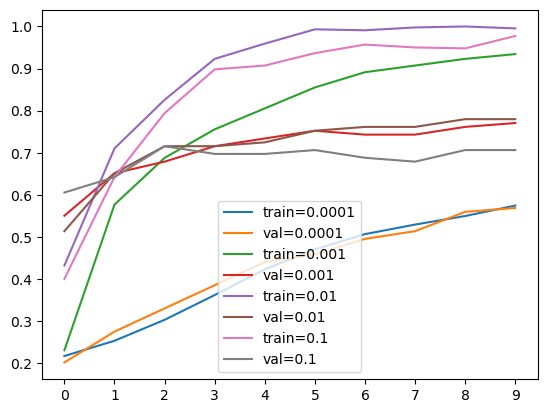

In [107]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [108]:
del scores[0.0001]

In [110]:
del scores[0.1]

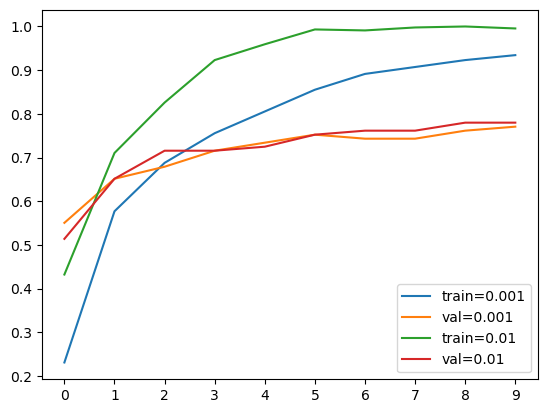

In [111]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

**Learning Rate = 0.01**

### Adding more layers

In [119]:
def x_make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(6)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [120]:
learning_rate = 0.01

scores = {}

for size in [10, 100, 500, 1000]:
    print(size)

    xception_model = x_make_model(learning_rate=learning_rate, size_inner=size)
    history = xception_model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/20
14/14 [==============================] - 11s 666ms/step - loss: 1.7590 - accuracy: 0.2851 - val_loss: 1.5830 - val_accuracy: 0.4128
Epoch 2/20
14/14 [==============================] - 7s 506ms/step - loss: 1.5162 - accuracy: 0.3552 - val_loss: 1.3935 - val_accuracy: 0.4220
Epoch 3/20
14/14 [==============================] - 7s 493ms/step - loss: 1.3788 - accuracy: 0.4005 - val_loss: 1.3263 - val_accuracy: 0.4312
Epoch 4/20
14/14 [==============================] - 7s 501ms/step - loss: 1.3027 - accuracy: 0.4751 - val_loss: 1.2851 - val_accuracy: 0.4771
Epoch 5/20
14/14 [==============================] - 7s 487ms/step - loss: 1.2306 - accuracy: 0.4796 - val_loss: 1.2873 - val_accuracy: 0.4771
Epoch 6/20
14/14 [==============================] - 7s 501ms/step - loss: 1.1758 - accuracy: 0.5271 - val_loss: 1.2199 - val_accuracy: 0.5505
Epoch 7/20
14/14 [==============================] - 7s 502ms/step - loss: 1.1199 - accuracy: 0.5814 - val_loss: 1.2258 - val_accuracy: 0.5413
Ep

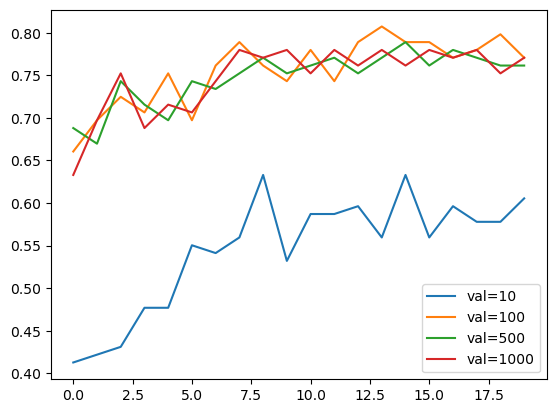

In [121]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))


plt.legend()

**Size = 100**

### Regularization and dropout

In [18]:
def x_make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(6)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [123]:
learning_rate = 0.01
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    xception_model = x_make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = xception_model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
14/14 [==============================] - 10s 594ms/step - loss: 2.7648 - accuracy: 0.3597 - val_loss: 1.0350 - val_accuracy: 0.5780
Epoch 2/30
14/14 [==============================] - 7s 485ms/step - loss: 1.0468 - accuracy: 0.5905 - val_loss: 1.0007 - val_accuracy: 0.6606
Epoch 3/30
14/14 [==============================] - 7s 501ms/step - loss: 0.7794 - accuracy: 0.6855 - val_loss: 0.7353 - val_accuracy: 0.6514
Epoch 4/30
14/14 [==============================] - 7s 501ms/step - loss: 0.5762 - accuracy: 0.7647 - val_loss: 0.6892 - val_accuracy: 0.7248
Epoch 5/30
14/14 [==============================] - 7s 501ms/step - loss: 0.4115 - accuracy: 0.8552 - val_loss: 0.7396 - val_accuracy: 0.6972
Epoch 6/30
14/14 [==============================] - 7s 498ms/step - loss: 0.2988 - accuracy: 0.9050 - val_loss: 0.6258 - val_accuracy: 0.7339
Epoch 7/30
14/14 [==============================] - 7s 472ms/step - loss: 0.1873 - accuracy: 0.9457 - val_loss: 0.7124 - val_accuracy: 0.7615
E

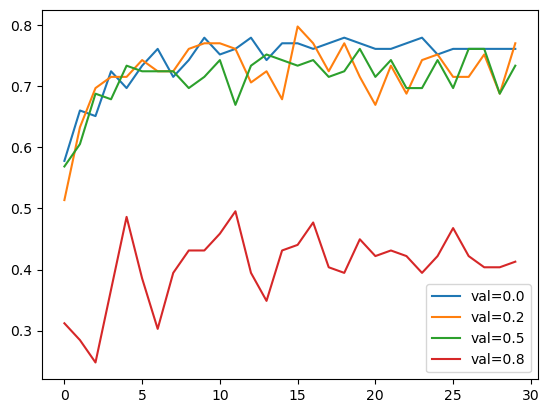

In [124]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

#plt.ylim(0.78, 0.86)
plt.legend()

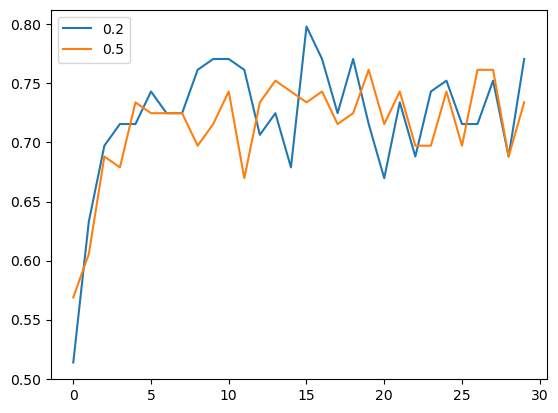

In [125]:


hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.5]
plt.plot(hist['val_accuracy'], label=0.5)

plt.legend()

**Drop Rate = 0.2**

In [127]:
learning_rate = 0.01
size = 100
droprate = 0.2

xception_model = x_make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = xception_model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
14/14 [==============================] - 13s 728ms/step - loss: 2.8954 - accuracy: 0.2534 - val_loss: 1.6074 - val_accuracy: 0.3945
Epoch 2/50
14/14 [==============================] - 9s 593ms/step - loss: 1.5306 - accuracy: 0.3937 - val_loss: 1.4212 - val_accuracy: 0.3945
Epoch 3/50
14/14 [==============================] - 9s 621ms/step - loss: 1.4426 - accuracy: 0.4186 - val_loss: 1.2119 - val_accuracy: 0.5688
Epoch 4/50
14/14 [==============================] - 9s 632ms/step - loss: 1.2012 - accuracy: 0.5362 - val_loss: 1.1322 - val_accuracy: 0.5229
Epoch 5/50
14/14 [==============================] - 9s 594ms/step - loss: 1.1392 - accuracy: 0.5611 - val_loss: 1.0449 - val_accuracy: 0.6147
Epoch 6/50
14/14 [==============================] - 9s 630ms/step - loss: 0.9855 - accuracy: 0.6244 - val_loss: 0.8853 - val_accuracy: 0.6881
Epoch 7/50
14/14 [==============================] - 9s 633ms/step - loss: 0.9963 - accuracy: 0.6041 - val_loss: 0.9435 - val_accuracy: 0.7156
Epoch

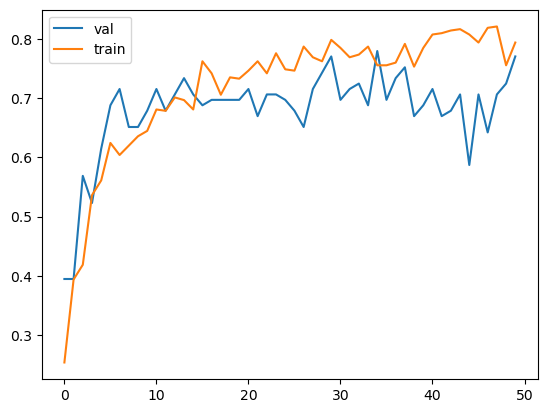

In [129]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### Data augmentation

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,            # Rotate images randomly up to 30 degrees
    width_shift_range=0.2,        # Shift images horizontally by 20% of the width
    height_shift_range=0.2,       # Shift images vertically by 20% of the height
    validation_split=0.2          # Split 20% for validation
)

# No data augmentation for validation

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='training',  # Get the training data
    shuffle=True        # Shuffle training data
)

# Validation data
val_ds = val_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',  # Get the validation data
    shuffle=False         # Typically, no need to shuffle validation data
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [37]:
learning_rate = 0.01
size = 100
droprate = 0.2

xception_model = x_make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = xception_model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
12/14 [========================>.....] - ETA: 0s - loss: 2.7701 - accuracy: 0.2910

KeyboardInterrupt: 

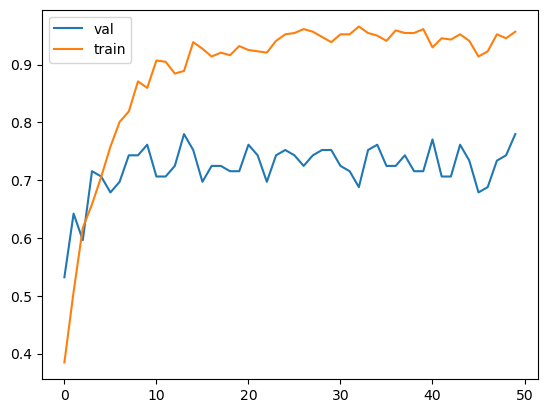

In [22]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## Checkpointing for Xception model after Data augmentation

In [68]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v3_{epoch:02d}_{val_accuracy:.3f}.keras',  # Use .keras
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [69]:
learning_rate = 0.01
size = 100
droprate = 0.2

xception_model = x_make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = xception_model.fit(train_ds, epochs=50, 
                             validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/50
14/14 [==============================] - 13s 806ms/step - loss: 3.0746 - accuracy: 0.2919 - val_loss: 1.5151 - val_accuracy: 0.4128
Epoch 2/50
14/14 [==============================] - 9s 677ms/step - loss: 1.4479 - accuracy: 0.4367 - val_loss: 1.1524 - val_accuracy: 0.5596
Epoch 3/50
14/14 [==============================] - 9s 674ms/step - loss: 1.2696 - accuracy: 0.5271 - val_loss: 1.0161 - val_accuracy: 0.5872
Epoch 4/50
14/14 [==============================] - 9s 659ms/step - loss: 1.1200 - accuracy: 0.5475 - val_loss: 1.0136 - val_accuracy: 0.5505
Epoch 5/50
14/14 [==============================] - 9s 651ms/step - loss: 1.0157 - accuracy: 0.6154 - val_loss: 0.9320 - val_accuracy: 0.5596
Epoch 6/50
14/14 [==============================] - 9s 675ms/step - loss: 0.9178 - accuracy: 0.6516 - val_loss: 0.8252 - val_accuracy: 0.6330
Epoch 7/50
14/14 [==============================] - 9s 675ms/step - loss: 1.0683 - accuracy: 0.5837 - val_loss: 0.8583 - val_accuracy: 0.6697
Epoch

### Using the model

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input


In [23]:
Xception_model = keras.models.load_model('xception_v1_12_0.771.keras')

Xception_v2_model = keras.models.load_model('xception_v2_08_0.789.keras')

Xception_v3_model = keras.models.load_model('xception_v3_31_0.780.keras')


In [23]:
import requests
import io
from PIL import Image
import numpy as np

def load_image_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx, 5xx)
        
        # Check Content-Type header
        content_type = response.headers.get('Content-Type', '')
        if 'image' not in content_type:
            raise ValueError(f"URL does not point to an image. Content-Type: {content_type}")
        
        # Attempt to open the image
        img = Image.open(io.BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# Example usage:
url = "https://thumbs.dreamstime.com/b/chess-flat-king-icon-stock-vector-image-royal-isolated-piece-outlined-214056020.jpg"  # Replace with your actual image URL
image = load_image_from_url(url)

if image is not None:
    # Convert image to numpy array
    x = np.array(image)
    print("Image loaded successfully. Shape:", x.shape)
else:
    print("Failed to load the image.")


Image loaded successfully. Shape: (800, 800, 3)


In [24]:
import numpy as np
img = image.resize((150, 150), Image.NEAREST)

x = np.array(img)
X = np.array([x])
X.shape


/tmp/ipykernel_170/1823649322.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


(1, 150, 150, 3)

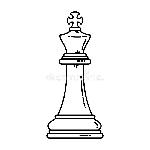

In [25]:
img

In [26]:
classes = ['Bishop', 
           'King', 
           'Knight', 
           'Pawn', 
           'Queen', 
           'Rook']


In [28]:
def pred_chess(url):
    
    image = load_image_from_url(url)
    
    img = image.resize((150, 150), Image.NEAREST)

    x = np.array(img)
    X = np.array([x])
    print(X.shape)
    X = preprocess_input(X)
    pred = Xception_model.predict(X)
    return dict(zip(classes, pred[0]))



In [29]:
url = "https://thumbs.dreamstime.com/b/chess-flat-king-icon-stock-vector-image-royal-isolated-piece-outlined-214056020.jpg"  # Replace with your actual image URL


pred_chess(url)

/tmp/ipykernel_65/1578523421.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


(1, 150, 150, 3)
1/1 [==============================] - 1s 986ms/step


{'Bishop': -0.6727343,
 'King': 2.2605693,
 'Knight': -3.5463777,
 'Pawn': -1.3936368,
 'Queen': 2.681847,
 'Rook': -0.548857}

In [30]:
url = 'https://thumbs.dreamstime.com/z/bishop-chess-piece-wooden-isolated-clipping-path-included-43949803.jpg'
pred_chess(url)

(1, 150, 150, 3)
1/1 [==============================] - 0s 23ms/step


/tmp/ipykernel_65/1578523421.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


{'Bishop': 1.8723819,
 'King': -2.3762875,
 'Knight': -5.0749083,
 'Pawn': 1.5868233,
 'Queen': -0.35720226,
 'Rook': 0.28349513}

**Even after trying different augmentations - Xception v1 works better**

## **Inception**

In [86]:
from tensorflow.keras.applications import InceptionV3

In [87]:
base_model = InceptionV3(weights='imagenet', include_top= False, input_shape=(150, 150, 3))

In [33]:
def i_make_model(learning_rate=0.01):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [80]:
lr=0.01
Inception_model = i_make_model(learning_rate=lr)
history = Inception_model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
14/14 [==============================] - 15s 780ms/step - loss: 10.5182 - accuracy: 0.2602 - val_loss: 4.6488 - val_accuracy: 0.4495
Epoch 2/10
14/14 [==============================] - 9s 631ms/step - loss: 3.5891 - accuracy: 0.5090 - val_loss: 3.0881 - val_accuracy: 0.5780
Epoch 3/10
14/14 [==============================] - 9s 637ms/step - loss: 2.6187 - accuracy: 0.5701 - val_loss: 2.6816 - val_accuracy: 0.5505
Epoch 4/10
14/14 [==============================] - 9s 630ms/step - loss: 1.3849 - accuracy: 0.6900 - val_loss: 1.5927 - val_accuracy: 0.6330
Epoch 5/10
14/14 [==============================] - 9s 630ms/step - loss: 1.4586 - accuracy: 0.6787 - val_loss: 1.8001 - val_accuracy: 0.6239
Epoch 6/10
14/14 [==============================] - 9s 632ms/step - loss: 1.2946 - accuracy: 0.7262 - val_loss: 1.8561 - val_accuracy: 0.6239
Epoch 7/10
14/14 [==============================] - 9s 633ms/step - loss: 1.2953 - accuracy: 0.6923 - val_loss: 3.3167 - val_accuracy: 0.4771
Epoc

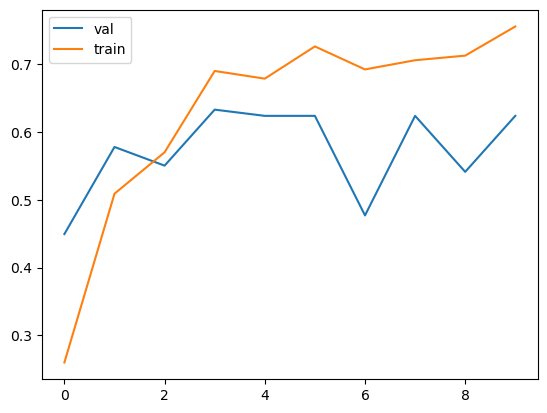

In [81]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

**Parameter tuning for Inception**

**Learning rates**

In [92]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    Inception_model = i_make_model(learning_rate=lr)
    history = Inception_model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
14/14 [==============================] - 14s 765ms/step - loss: 3.0790 - accuracy: 0.1041 - val_loss: 3.1322 - val_accuracy: 0.1101
Epoch 2/10
14/14 [==============================] - 9s 609ms/step - loss: 2.6398 - accuracy: 0.1380 - val_loss: 2.9452 - val_accuracy: 0.1376
Epoch 3/10
14/14 [==============================] - 9s 634ms/step - loss: 2.4590 - accuracy: 0.1923 - val_loss: 2.7310 - val_accuracy: 0.1376
Epoch 4/10
14/14 [==============================] - 9s 634ms/step - loss: 2.2132 - accuracy: 0.2036 - val_loss: 2.5083 - val_accuracy: 0.1560
Epoch 5/10
14/14 [==============================] - 9s 616ms/step - loss: 2.1540 - accuracy: 0.2262 - val_loss: 2.3664 - val_accuracy: 0.1743
Epoch 6/10
14/14 [==============================] - 9s 633ms/step - loss: 2.0462 - accuracy: 0.2783 - val_loss: 2.2516 - val_accuracy: 0.1927
Epoch 7/10
14/14 [==============================] - 9s 633ms/step - loss: 1.8551 - accuracy: 0.3054 - val_loss: 2.0998 - val_accuracy: 0.220

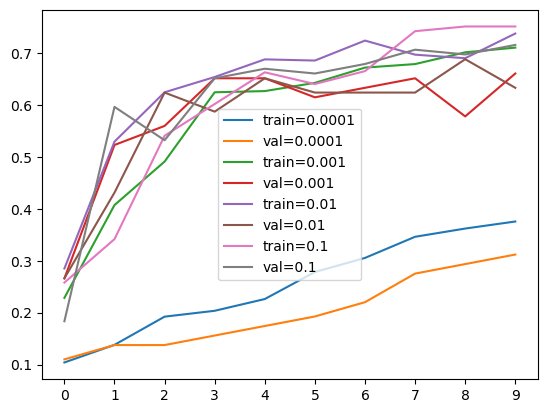

In [94]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

#### Learnung Rate : 0.001

In [95]:
lr = 0.001


In [96]:
def i_make_model(learning_rate=0.01, size_inner=100):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(299, 299, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(299, 299, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(6)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [97]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 500, 1000]:
    print(size)

    Inception_model = i_make_model(learning_rate=learning_rate, size_inner=size)
    history = Inception_model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
14/14 [==============================] - 14s 763ms/step - loss: 1.8542 - accuracy: 0.2647 - val_loss: 1.5514 - val_accuracy: 0.4495
Epoch 2/10
14/14 [==============================] - 9s 638ms/step - loss: 1.6024 - accuracy: 0.3710 - val_loss: 1.3344 - val_accuracy: 0.5138
Epoch 3/10
14/14 [==============================] - 9s 634ms/step - loss: 1.4553 - accuracy: 0.4638 - val_loss: 1.1878 - val_accuracy: 0.5321
Epoch 4/10
14/14 [==============================] - 9s 630ms/step - loss: 1.2733 - accuracy: 0.5068 - val_loss: 1.1596 - val_accuracy: 0.5596
Epoch 5/10
14/14 [==============================] - 9s 627ms/step - loss: 1.2551 - accuracy: 0.5543 - val_loss: 1.0828 - val_accuracy: 0.5596
Epoch 6/10
14/14 [==============================] - 9s 631ms/step - loss: 1.1488 - accuracy: 0.5860 - val_loss: 1.0732 - val_accuracy: 0.5872
Epoch 7/10
14/14 [==============================] - 9s 622ms/step - loss: 1.0671 - accuracy: 0.5973 - val_loss: 1.0442 - val_accuracy: 0.6147
Ep

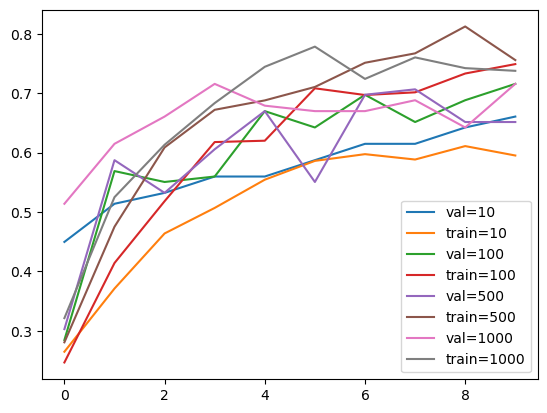

In [99]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))
    plt.plot(hist['accuracy'], label=('train=%s' % size))

plt.legend()



**Size=100**

**Regularization**

In [88]:
def i_make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(6)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    Inception_model = i_make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = Inception_model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
14/14 [==============================] - 13s 733ms/step - loss: 3.0734 - accuracy: 0.2376 - val_loss: 1.6423 - val_accuracy: 0.3211
Epoch 2/30
14/14 [==============================] - 8s 582ms/step - loss: 1.4750 - accuracy: 0.4118 - val_loss: 1.2828 - val_accuracy: 0.5229
Epoch 3/30
14/14 [==============================] - 8s 584ms/step - loss: 1.1786 - accuracy: 0.5679 - val_loss: 1.1411 - val_accuracy: 0.5963
Epoch 4/30
14/14 [==============================] - 8s 604ms/step - loss: 1.0477 - accuracy: 0.6199 - val_loss: 1.0435 - val_accuracy: 0.6330
Epoch 5/30
14/14 [==============================] - 8s 611ms/step - loss: 0.9785 - accuracy: 0.6176 - val_loss: 1.0624 - val_accuracy: 0.5963
Epoch 6/30
14/14 [==============================] - 8s 599ms/step - loss: 0.8415 - accuracy: 0.7014 - val_loss: 0.9397 - val_accuracy: 0.6422
Epoch 7/30
14/14 [==============================] - 8s 608ms/step - loss: 0.8198 - accuracy: 0.6991 - val_loss: 0.9950 - val_accuracy: 0.6330
E

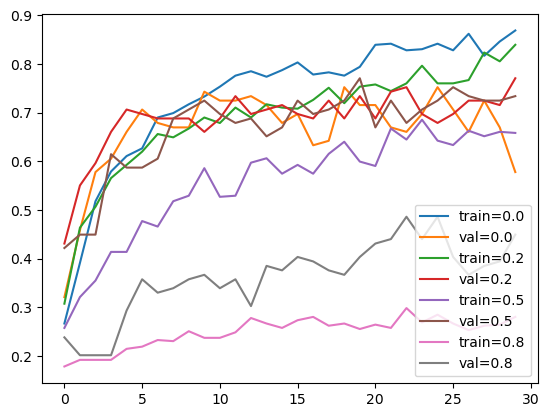

In [103]:
for droprate, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % droprate))
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

#plt.ylim(0.78, 0.86)
plt.legend()

**droprate=0.2**

### Checkpointing for InceptionV3 

In [45]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'InceptionV3_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,            # Rotate images randomly up to 30 degrees
    zoom_range=0.2,       # Shift images vertically by 20% of the height
    validation_split=0.2          # Split 20% for validation
)

# No data augmentation for validation

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='training',  # Get the training data
    shuffle=True        # Shuffle training data
)

# Validation data
val_ds = val_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',  # Get the validation data
    shuffle=False         # Typically, no need to shuffle validation data
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [64]:
learning_rate = 0.001
size = 100
droprate = 0.2

Inception_model = i_make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = Inception_model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
14/14 [==============================] - 14s 785ms/step - loss: 2.5562 - accuracy: 0.2624 - val_loss: 1.2192 - val_accuracy: 0.5596
Epoch 2/50
14/14 [==============================] - 8s 607ms/step - loss: 1.3906 - accuracy: 0.4706 - val_loss: 1.0597 - val_accuracy: 0.6697
Epoch 3/50
14/14 [==============================] - 8s 608ms/step - loss: 1.1274 - accuracy: 0.5814 - val_loss: 0.8687 - val_accuracy: 0.7064
Epoch 4/50
14/14 [==============================] - 8s 612ms/step - loss: 1.0485 - accuracy: 0.5950 - val_loss: 0.8519 - val_accuracy: 0.6972
Epoch 5/50
14/14 [==============================] - 8s 601ms/step - loss: 0.9423 - accuracy: 0.6493 - val_loss: 0.8999 - val_accuracy: 0.7156
Epoch 6/50
14/14 [==============================] - 8s 605ms/step - loss: 0.8514 - accuracy: 0.6787 - val_loss: 0.8081 - val_accuracy: 0.6881
Epoch 7/50
14/14 [==============================] - 8s 593ms/step - loss: 0.7954 - accuracy: 0.6629 - val_loss: 0.7416 - val_accuracy: 0.7248
Epoch

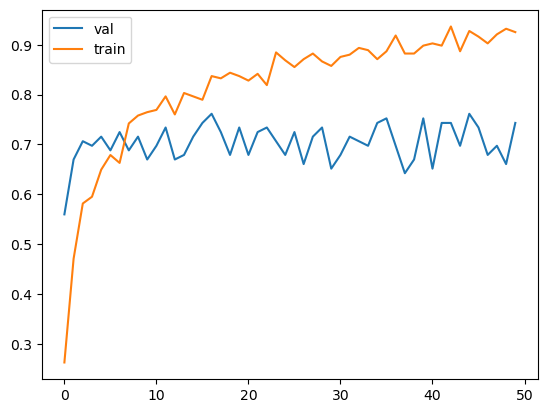

In [65]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### Using the InceptionV3 model

I chose the epoc 13 because it has less variation between Train accuracy and Validation Accuracy

In [66]:
InceptionV3_model = keras.models.load_model('InceptionV3_v1_26_0.725.keras')


In [67]:
def pred_chess(url):
    
    image = load_image_from_url(url)
    
    img = image.resize((150, 150), Image.NEAREST)

    x = np.array(img)
    X = np.array([x])
    print(X.shape)
    X = preprocess_input(X)
    pred = InceptionV3_model.predict(X)
    return dict(zip(classes, pred[0]))



In [68]:
url = "https://thumbs.dreamstime.com/b/chess-flat-king-icon-stock-vector-image-royal-isolated-piece-outlined-214056020.jpg"  # Replace with your actual image URL


pred_chess(url)

/tmp/ipykernel_65/2252519520.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


(1, 150, 150, 3)
1/1 [==============================] - 1s 1s/step


{'Bishop': 0.119130924,
 'King': 2.3383915,
 'Knight': -4.415114,
 'Pawn': 1.0134006,
 'Queen': 1.0484799,
 'Rook': 1.343016}

In [69]:
url = 'https://thumbs.dreamstime.com/z/bishop-chess-piece-wooden-isolated-clipping-path-included-43949803.jpg'


pred_chess(url)


(1, 150, 150, 3)
1/1 [==============================] - 0s 26ms/step


/tmp/ipykernel_65/2252519520.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


{'Bishop': -0.6412336,
 'King': -2.5566278,
 'Knight': -1.3901354,
 'Pawn': -0.020743836,
 'Queen': -0.09369173,
 'Rook': 0.39927775}

In [70]:
url = 'https://images.chesscomfiles.com/uploads/v1/article/15680.8ba56ba3.5000x5000o.1c5591a9bd76.jpeg'

pred_chess(url)

/tmp/ipykernel_65/2252519520.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


(1, 150, 150, 3)
1/1 [==============================] - 0s 25ms/step


{'Bishop': -2.0646522,
 'King': 0.039237387,
 'Knight': -1.3687739,
 'Pawn': 3.1721728,
 'Queen': 2.6205041,
 'Rook': 2.2397761}

In [16]:
from tensorflow.keras.applications import VGG16

model = VGG16(
    weights='imagenet',  # Use pre-trained weights from ImageNet
    include_top=False,   # Exclude the top layer to use the model for transfer learning
    input_shape=(150, 150, 3)  # Define input shape (modify based on your data)
)



In [17]:
def v_make_model(learning_rate=0.01):
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,            # Rotate images randomly up to 30 degrees
    width_shift_range=0.2,        # Shift images horizontally by 20% of the width
    height_shift_range=0.2,       # Shift images vertically by 20% of the height
    validation_split=0.2          # Split 20% for validation
)

# No data augmentation for validation

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='training',  # Get the training data
    shuffle=True        # Shuffle training data
)

# Validation data
val_ds = val_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',  # Get the validation data
    shuffle=False         # Typically, no need to shuffle validation data
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [82]:
lr=0.01
VGG_model = v_make_model(learning_rate=lr)
history = VGG_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
14/14 [==============================] - 13s 799ms/step - loss: 1.6607 - accuracy: 0.3235 - val_loss: 1.2168 - val_accuracy: 0.6514
Epoch 2/10
14/14 [==============================] - 8s 607ms/step - loss: 1.2630 - accuracy: 0.5430 - val_loss: 0.9969 - val_accuracy: 0.6330
Epoch 3/10
14/14 [==============================] - 8s 598ms/step - loss: 1.0894 - accuracy: 0.6063 - val_loss: 0.8687 - val_accuracy: 0.7156
Epoch 4/10
14/14 [==============================] - 8s 604ms/step - loss: 0.9573 - accuracy: 0.6923 - val_loss: 0.8022 - val_accuracy: 0.7339
Epoch 5/10
14/14 [==============================] - 8s 606ms/step - loss: 0.9111 - accuracy: 0.7014 - val_loss: 0.7822 - val_accuracy: 0.7339
Epoch 6/10
14/14 [==============================] - 8s 610ms/step - loss: 0.8472 - accuracy: 0.7195 - val_loss: 0.7337 - val_accuracy: 0.7248
Epoch 7/10
14/14 [==============================] - 8s 603ms/step - loss: 0.8015 - accuracy: 0.7443 - val_loss: 0.7047 - val_accuracy: 0.7156
Epoch

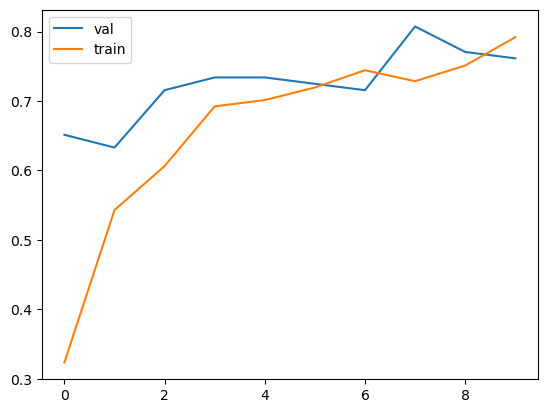

In [83]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [84]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    VGG_model = v_make_model(learning_rate=lr)
    history = VGG_model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/20
14/14 [==============================] - 10s 666ms/step - loss: 2.0188 - accuracy: 0.1335 - val_loss: 2.0534 - val_accuracy: 0.1468
Epoch 2/20
14/14 [==============================] - 8s 607ms/step - loss: 1.9826 - accuracy: 0.1403 - val_loss: 2.0046 - val_accuracy: 0.1560
Epoch 3/20
14/14 [==============================] - 8s 606ms/step - loss: 1.9330 - accuracy: 0.1403 - val_loss: 1.9650 - val_accuracy: 0.1560
Epoch 4/20
14/14 [==============================] - 8s 592ms/step - loss: 1.9105 - accuracy: 0.1335 - val_loss: 1.9304 - val_accuracy: 0.1376
Epoch 5/20
14/14 [==============================] - 8s 610ms/step - loss: 1.8828 - accuracy: 0.1516 - val_loss: 1.9020 - val_accuracy: 0.1376
Epoch 6/20
14/14 [==============================] - 8s 603ms/step - loss: 1.8602 - accuracy: 0.1697 - val_loss: 1.8775 - val_accuracy: 0.1468
Epoch 7/20
14/14 [==============================] - 8s 597ms/step - loss: 1.8384 - accuracy: 0.1674 - val_loss: 1.8573 - val_accuracy: 0.119

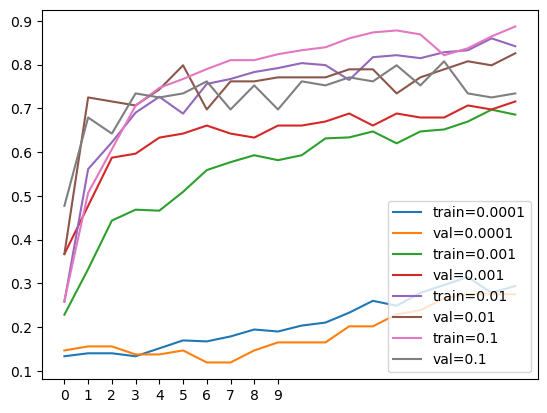

In [85]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [86]:
0.01

0.01

# RESUME

In [19]:
def v_make_model(learning_rate=0.01, size_inner=100):
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(6)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [42]:
learning_rate = 0.01

scores = {}

for size in [10, 25, 50, 100]:
    print(size)

    VGG_model = v_make_model(learning_rate=learning_rate, size_inner=size)
    history = VGG_model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
14/14 [==============================] - 10s 652ms/step - loss: 1.7987 - accuracy: 0.2014 - val_loss: 1.6664 - val_accuracy: 0.3303
Epoch 2/10
14/14 [==============================] - 8s 588ms/step - loss: 1.7345 - accuracy: 0.2376 - val_loss: 1.6021 - val_accuracy: 0.4128
Epoch 3/10
14/14 [==============================] - 8s 599ms/step - loss: 1.6478 - accuracy: 0.2602 - val_loss: 1.5070 - val_accuracy: 0.5229
Epoch 4/10
14/14 [==============================] - 8s 606ms/step - loss: 1.6049 - accuracy: 0.3032 - val_loss: 1.3893 - val_accuracy: 0.5229
Epoch 5/10
14/14 [==============================] - 8s 609ms/step - loss: 1.5120 - accuracy: 0.3348 - val_loss: 1.3083 - val_accuracy: 0.5321
Epoch 6/10
14/14 [==============================] - 8s 611ms/step - loss: 1.5738 - accuracy: 0.3235 - val_loss: 1.2782 - val_accuracy: 0.5505
Epoch 7/10
14/14 [==============================] - 8s 608ms/step - loss: 1.4755 - accuracy: 0.3665 - val_loss: 1.2528 - val_accuracy: 0.5688
Ep

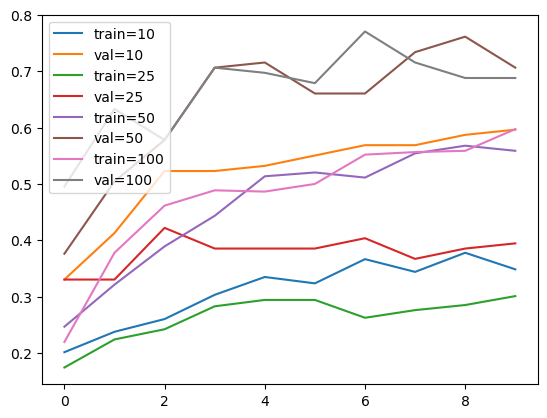

In [43]:
for size, hist in scores.items():
    
    plt.plot(hist['accuracy'], label=('train=%s' % size))

    plt.plot(hist['val_accuracy'], label=('val=%s' % size))


plt.legend()

#### Regularization and dropout

In [20]:
def v_make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = VGG16(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(6)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [39]:
learning_rate = 0.01
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    VGG_model = v_make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = VGG_model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
14/14 [==============================] - 10s 673ms/step - loss: 1.5388 - accuracy: 0.3688 - val_loss: 1.0620 - val_accuracy: 0.5963
Epoch 2/30
14/14 [==============================] - 8s 607ms/step - loss: 1.1104 - accuracy: 0.5882 - val_loss: 0.8880 - val_accuracy: 0.6972
Epoch 3/30
14/14 [==============================] - 8s 613ms/step - loss: 0.8729 - accuracy: 0.6652 - val_loss: 0.7409 - val_accuracy: 0.7156
Epoch 4/30
14/14 [==============================] - 8s 606ms/step - loss: 0.7140 - accuracy: 0.7308 - val_loss: 0.5220 - val_accuracy: 0.7798
Epoch 5/30
14/14 [==============================] - 8s 602ms/step - loss: 0.7603 - accuracy: 0.7104 - val_loss: 0.6643 - val_accuracy: 0.7064
Epoch 6/30
14/14 [==============================] - 8s 594ms/step - loss: 0.6354 - accuracy: 0.7715 - val_loss: 0.6848 - val_accuracy: 0.7615
Epoch 7/30
14/14 [==============================] - 8s 600ms/step - loss: 0.5997 - accuracy: 0.7715 - val_loss: 0.6861 - val_accuracy: 0.7431
E

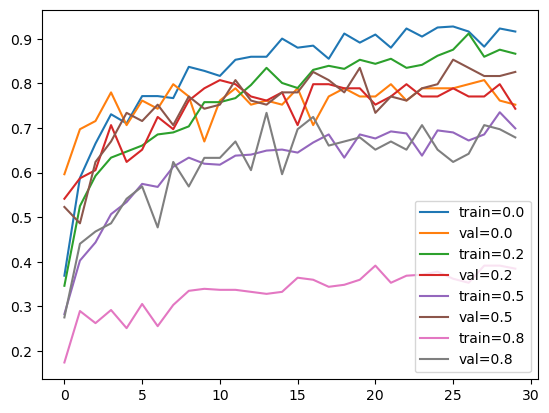

In [40]:
for droprate, hist in scores.items():
    
    plt.plot(hist['accuracy'], label=('train=%s' % droprate))

    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))


plt.legend()

## Data Augmentation

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,            # Rotate images randomly up to 30 degrees
    width_shift_range=0.3,        # Shift images horizontally by 20% of the width
    height_shift_range=0.3,       # Shift images vertically by 20% of the height
    validation_split=0.2          # Split 20% for validation
)

# No data augmentation for validation

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32, 
    subset='training',  # Get the training data
    shuffle=True        # Shuffle training data
)

# Validation data
val_ds = val_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',  # Get the validation data
    shuffle=False         # Typically, no need to shuffle validation data
)

Found 490 images belonging to 6 classes.
Found 121 images belonging to 6 classes.


### Train on Augmented Dataset

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

learning_rate = 0.01
size = 150
droprate = 0.3

scores = {} 

VGG_model = v_make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)
# Inception_model = i_make_model(
#     learning_rate=learning_rate,
#     size_inner=size,
#     droprate=droprate
# )
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,          # Stop after 3 epochs of no improvement
    restore_best_weights=True  # Restore weights from the best epoch
)
history = VGG_model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping])
# history = Inception_model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[early_stopping])


print() 

Epoch 1/20
16/16 [==============================] - 11s 630ms/step - loss: 1.8786 - accuracy: 0.2673 - val_loss: 1.2786 - val_accuracy: 0.3802
Epoch 2/20
16/16 [==============================] - 9s 576ms/step - loss: 1.2948 - accuracy: 0.5184 - val_loss: 0.9583 - val_accuracy: 0.6281
Epoch 3/20
16/16 [==============================] - 9s 577ms/step - loss: 1.1678 - accuracy: 0.5531 - val_loss: 0.8591 - val_accuracy: 0.6942
Epoch 4/20
16/16 [==============================] - 9s 560ms/step - loss: 1.0282 - accuracy: 0.5898 - val_loss: 0.8387 - val_accuracy: 0.6446
Epoch 5/20
16/16 [==============================] - 9s 570ms/step - loss: 0.9598 - accuracy: 0.6306 - val_loss: 0.6923 - val_accuracy: 0.6777
Epoch 6/20
16/16 [==============================] - 9s 585ms/step - loss: 0.9327 - accuracy: 0.6306 - val_loss: 0.6782 - val_accuracy: 0.7025
Epoch 7/20
16/16 [==============================] - 9s 587ms/step - loss: 0.9071 - accuracy: 0.6449 - val_loss: 0.6980 - val_accuracy: 0.7107
Epoch

### Confusion matrix on Augmented Dataset

4/4 [==============================] - 3s 762ms/step
Final Validation Accuracy: 80.17%


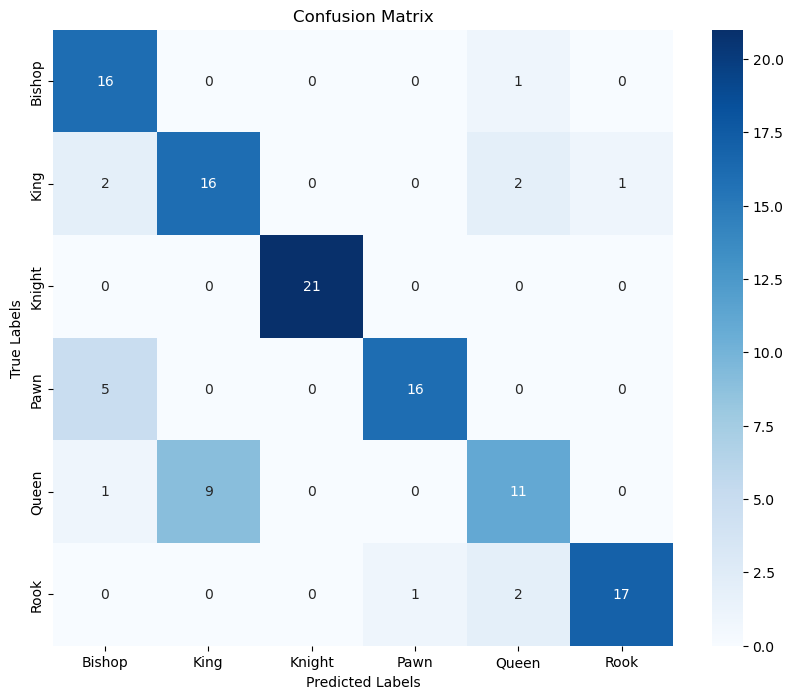

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict on the validation set
y_pred = VGG_model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices

# Step 2: Extract true labels from val_ds
y_true = val_ds.classes  # True labels are stored in `classes` attribute of the generator

# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes) 

# Step 4: Calculate validation accuracy
val_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Final Validation Accuracy: {val_accuracy:.2%}")

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_ds.class_indices.keys(), yticklabels=val_ds.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


**even with data augmentation there is confusion between king and queen because of less images. Taht's why we are generating 30 images with data augmentation.**

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to the dataset
path = 'Classifying_Chessmen/Chessmen_Images_Data'

# Data augmentation setup (focused on zoom and downward shift)
augmentor = ImageDataGenerator(
    zoom_range=(0.8, 1.2),  # Zoom in to capture top features
    height_shift_range=(-0.2, 0.0),  # Shift downward to emphasize the top
    fill_mode="nearest"
)

# Function to generate and save augmented images
def augment_and_save(class_name, num_images=30):
    # Define source path for the class
    class_path = os.path.join(path, class_name)
    
    # Create a generator for images in the class folder
    class_images_gen = augmentor.flow_from_directory(
        directory=path,
        classes=[class_name],
        target_size=(299, 299),
        batch_size=1,  # Process one image at a time
        save_to_dir=class_path,  # Save to the same class directory
        save_prefix=f"{class_name}_aug",  # Add a prefix to augmented images
        save_format="jpeg"  # Save in JPEG format
    )
    
    # Generate and save the specified number of images
    for _ in range(num_images):
        class_images_gen.next()  # Generate one batch (1 image in this case)

# Generate 30 augmented images for King and Queen
augment_and_save("King", num_images=30)
augment_and_save("Queen", num_images=30)


Found 75 images belonging to 1 classes.
Found 77 images belonging to 1 classes.


## Without Data Augmentation

In [23]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input, 
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='training'  # Get the training data
)

# Validation data
val_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation'  # Get the validation data
)


Found 490 images belonging to 6 classes.
Found 121 images belonging to 6 classes.


### Train On Original Dataset (Not Augmented)

In [64]:
learning_rate = 0.01
size = 100
droprate = 0.2

scores = {} 

VGG_model = v_make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = VGG_model.fit(train_ds, epochs=20, validation_data=val_ds)
print() 

Epoch 1/20
14/14 [==============================] - 8s 552ms/step - loss: 1.6616 - accuracy: 0.3665 - val_loss: 1.0958 - val_accuracy: 0.6422
Epoch 2/20
14/14 [==============================] - 7s 478ms/step - loss: 1.0601 - accuracy: 0.6086 - val_loss: 0.7971 - val_accuracy: 0.7156
Epoch 3/20
14/14 [==============================] - 7s 476ms/step - loss: 0.8341 - accuracy: 0.6968 - val_loss: 0.6426 - val_accuracy: 0.7798
Epoch 4/20
14/14 [==============================] - 7s 481ms/step - loss: 0.6744 - accuracy: 0.7443 - val_loss: 0.6510 - val_accuracy: 0.7156
Epoch 5/20
14/14 [==============================] - 7s 482ms/step - loss: 0.6207 - accuracy: 0.7624 - val_loss: 0.5265 - val_accuracy: 0.7706
Epoch 6/20
14/14 [==============================] - 7s 479ms/step - loss: 0.5196 - accuracy: 0.8122 - val_loss: 0.4941 - val_accuracy: 0.8257
Epoch 7/20
14/14 [==============================] - 7s 471ms/step - loss: 0.4492 - accuracy: 0.8235 - val_loss: 0.4328 - val_accuracy: 0.8165
Epoch 

### On Original Dataset (Not Augmented)

4/4 [==============================] - 2s 538ms/step
Final Validation Accuracy: 19.27%


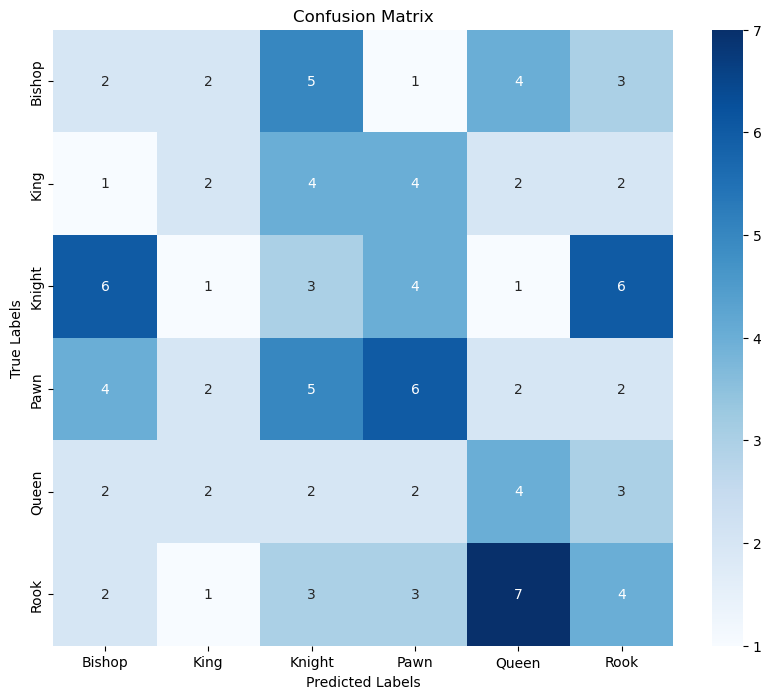

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict on the validation set
y_pred = VGG_model.predict(val_ds)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices

# Step 2: Extract true labels from val_ds
y_true = val_ds.classes  # True labels are stored in `classes` attribute of the generator

# Step 3: Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes) 

# Step 4: Calculate validation accuracy
val_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Final Validation Accuracy: {val_accuracy:.2%}")

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_ds.class_indices.keys(), yticklabels=val_ds.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### Checkpointing for VGG16 model

In [36]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'VGG_v1_{epoch:02d}_{val_accuracy:.3f}.keras',  # Use .keras
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [37]:
learning_rate = 0.01
size = 100
droprate = 0.2

VGG_model = v_make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = VGG_model.fit(train_ds, epochs=50, 
                             validation_data=val_ds, callbacks=[checkpoint])

TypeError: v_make_model() got an unexpected keyword argument 'droprate'

In [ ]:
def pred_chess(url):
    
    image = load_image_from_url(url)
    
    img = image.resize((150, 150), Image.NEAREST)

    x = np.array(img)
    X = np.array([x])
    print(X.shape)
    X = preprocess_input(X)
    pred = VGG_model.predict(X)
    return dict(zip(classes, pred[0]))



In [ ]:
url = "https://thumbs.dreamstime.com/b/chess-flat-king-icon-stock-vector-image-royal-isolated-piece-outlined-214056020.jpg"  # Replace with your actual image URL


pred_chess(url)

### Densenet

In [72]:
from tensorflow.keras.applications import DenseNet121, DenseNet169

model = DenseNet121(
    weights='imagenet',  # Use pre-trained weights from ImageNet
    include_top=False,   # Exclude the top layer to use the model for transfer learning
    input_shape=(150, 150, 3)  # Define input shape (modify based on your data)
)



In [73]:
def d_make_model(learning_rate=0.01):
    base_model = DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,            # Rotate images randomly up to 30 degrees
    width_shift_range=0.2,        # Shift images horizontally by 20% of the width
    height_shift_range=0.2,       # Shift images vertically by 20% of the height
    validation_split=0.2          # Split 20% for validation
)

# No data augmentation for validation

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='training',  # Get the training data
    shuffle=True        # Shuffle training data
)

# Validation data
val_ds = val_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',  # Get the validation data
    shuffle=False         # Typically, no need to shuffle validation data
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [75]:
lr=0.01
Densenet_model = d_make_model(learning_rate=lr)
history = Inception_model.fit(train_ds, epochs=10, validation_data=val_ds)


Epoch 1/10
14/14 [==============================] - 9s 657ms/step - loss: 0.4721 - accuracy: 0.8462 - val_loss: 0.6620 - val_accuracy: 0.7339
Epoch 2/10
14/14 [==============================] - 8s 613ms/step - loss: 0.4390 - accuracy: 0.8371 - val_loss: 0.8250 - val_accuracy: 0.6789
Epoch 3/10
14/14 [==============================] - 8s 603ms/step - loss: 0.4972 - accuracy: 0.8213 - val_loss: 0.6154 - val_accuracy: 0.7248
Epoch 4/10
14/14 [==============================] - 8s 585ms/step - loss: 0.5175 - accuracy: 0.8122 - val_loss: 0.7305 - val_accuracy: 0.7339
Epoch 5/10
14/14 [==============================] - 8s 610ms/step - loss: 0.4981 - accuracy: 0.8145 - val_loss: 0.7296 - val_accuracy: 0.6789
Epoch 6/10
14/14 [==============================] - 8s 617ms/step - loss: 0.5518 - accuracy: 0.7805 - val_loss: 0.7934 - val_accuracy: 0.7339
Epoch 7/10
14/14 [==============================] - 8s 615ms/step - loss: 0.5584 - accuracy: 0.7964 - val_loss: 0.9508 - val_accuracy: 0.6789
Epoch 

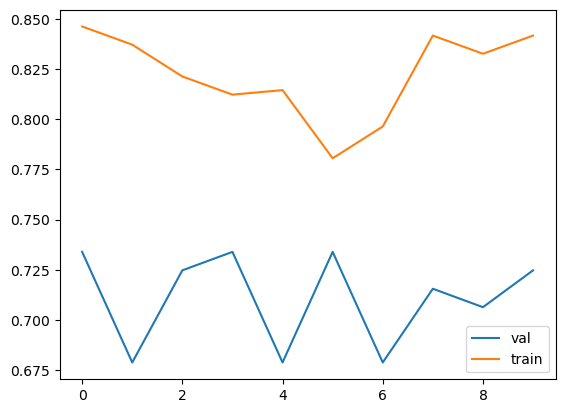

In [76]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [77]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    Densenet_model = d_make_model(learning_rate=lr)
    history = Densenet_model.fit(train_ds, epochs=20, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/20
14/14 [==============================] - 18s 882ms/step - loss: 2.5444 - accuracy: 0.1878 - val_loss: 2.5357 - val_accuracy: 0.1835
Epoch 2/20
14/14 [==============================] - 8s 619ms/step - loss: 2.3837 - accuracy: 0.1833 - val_loss: 2.3595 - val_accuracy: 0.1743
Epoch 3/20
14/14 [==============================] - 8s 607ms/step - loss: 2.2824 - accuracy: 0.1833 - val_loss: 2.2427 - val_accuracy: 0.2202
Epoch 4/20
14/14 [==============================] - 8s 605ms/step - loss: 2.2517 - accuracy: 0.1968 - val_loss: 2.1567 - val_accuracy: 0.2294
Epoch 5/20
14/14 [==============================] - 8s 609ms/step - loss: 2.1173 - accuracy: 0.2308 - val_loss: 2.0634 - val_accuracy: 0.2294
Epoch 6/20
14/14 [==============================] - 8s 613ms/step - loss: 2.1156 - accuracy: 0.2376 - val_loss: 1.9822 - val_accuracy: 0.2661
Epoch 7/20
14/14 [==============================] - 8s 606ms/step - loss: 2.0350 - accuracy: 0.2308 - val_loss: 1.9072 - val_accuracy: 0.275

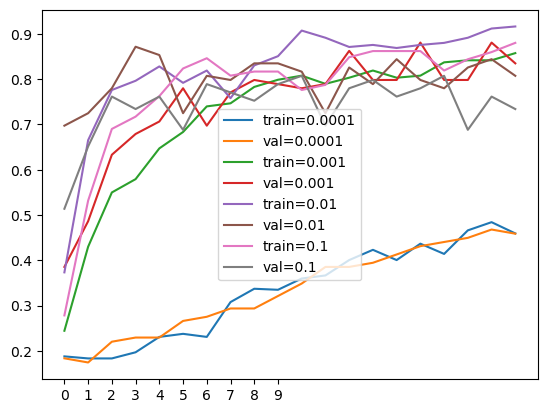

In [78]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

### Redundant

#### Data Augmentation

In [20]:
DATA_DIR = 'Classifying_Chessmen/Chessmen_Images_Data'
image_size = (150, 150)
batch_size = 32

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Augmentation parameters
    -rotation_range=30,            # Rotate images randomly up to 30 degrees
    -width_shift_range=0.2,        # Shift images horizontally by 20% of the width
    -height_shift_range=0.2,       # Shift images vertically by 20% of the height
    zoom_range=0.2,               # Zoom in/out up to 20%
    shear_range=0.2,              # Shear transformations up to 20%
    horizontal_flip=True,         # Randomly flip images horizontally
    brightness_range=(0.8, 1.2),  # Adjust brightness between 80% and 120%
    
    # Validation split for training/validation
    validation_split=0.3,         # Use 30% of data for validation
    
    # Fill and preprocessing
    fill_mode='nearest'           # Fill missing pixels with nearest values

In [72]:
# train_gen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rotation_range=30,            # Rotate images randomly up to 30 degrees
#     width_shift_range=0.2,        # Shift images horizontally by 20% of the width
#     height_shift_range=0.2,
#     zoom_range=0.2,               # Zoom in/out up to 20%
#     shear_range=0.2,
#     validation_split=0.2  # Split 20% for validation
# )

# # Training data
# train_ds = train_gen.flow_from_directory(
#     DATA_DIR,
#     target_size=(150, 150),
#     batch_size=32,
#     subset='training'  # Get the training data
# )

# # Validation data
# val_ds = train_gen.flow_from_directory(
#     DATA_DIR,
#     target_size=(150, 150),
#     batch_size=32,
#     subset='validation'  # Get the validation data
# )


In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,            # Rotate images randomly up to 30 degrees
    width_shift_range=0.2,        # Shift images horizontally by 20% of the width
    height_shift_range=0.2,       # Shift images vertically by 20% of the height
#     zoom_range=0.2,               # Zoom in/out up to 20%
#     shear_range=0.2,              # Shear transformation
#     horizontal_flip=True,         # Randomly flip images horizontally
    validation_split=0.2          # Split 20% for validation
)

# No data augmentation for validation
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='training',  # Get the training data
    shuffle=True        # Shuffle training data
)

# Validation data
val_ds = val_gen.flow_from_directory(
    DATA_DIR,
    target_size=(150, 150),
    batch_size=32,
    subset='validation',  # Get the validation data
    shuffle=False         # Typically, no need to shuffle validation data
)


Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [64]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = InceptionV3(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(6)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [76]:
learning_rate = 0.01
size = 500
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
14/14 [==============================] - 15s 757ms/step - loss: 34.7939 - accuracy: 0.1719 - val_loss: 6.5649 - val_accuracy: 0.2844
Epoch 2/50
14/14 [==============================] - 9s 607ms/step - loss: 2.8961 - accuracy: 0.3145 - val_loss: 1.5065 - val_accuracy: 0.4037
Epoch 3/50
14/14 [==============================] - 9s 632ms/step - loss: 1.4293 - accuracy: 0.4615 - val_loss: 1.1860 - val_accuracy: 0.5596
Epoch 4/50
14/14 [==============================] - 9s 634ms/step - loss: 1.2400 - accuracy: 0.4819 - val_loss: 1.0493 - val_accuracy: 0.5138
Epoch 5/50
14/14 [==============================] - 9s 632ms/step - loss: 1.1518 - accuracy: 0.5226 - val_loss: 0.9315 - val_accuracy: 0.5872
Epoch 6/50
14/14 [==============================] - 9s 626ms/step - loss: 1.1158 - accuracy: 0.5543 - val_loss: 0.8490 - val_accuracy: 0.6514
Epoch 7/50
14/14 [==============================] - 9s 618ms/step - loss: 1.0382 - accuracy: 0.5633 - val_loss: 0.9256 - val_accuracy: 0.6514
Epoc

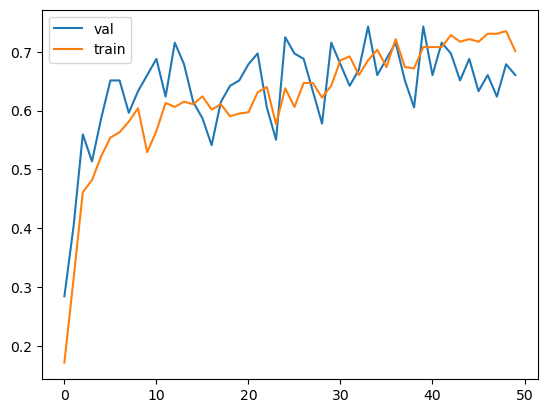

In [77]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [78]:
def pred_chess(url):
    
    image = load_image_from_url(url)
    
    img = image.resize((150, 150), Image.NEAREST)

    x = np.array(img)
    X = np.array([x])
    print(X.shape)
    X = preprocess_input(X)
    pred = model.predict(X)
    return dict(zip(classes, pred[0]))



In [79]:
url = 'https://thumbs.dreamstime.com/z/bishop-chess-piece-wooden-isolated-clipping-path-included-43949803.jpg'
pred_chess(url)

/tmp/ipykernel_51/1339682588.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


(1, 150, 150, 3)
1/1 [==============================] - 1s 1s/step


{'Bishop': 1.4239346,
 'King': -0.53979737,
 'Knight': -1.122818,
 'Pawn': 0.6487172,
 'Queen': 0.09356905,
 'Rook': -1.0424156}

In [80]:
url = "https://thumbs.dreamstime.com/b/chess-flat-king-icon-stock-vector-image-royal-isolated-piece-outlined-214056020.jpg"  # Replace with your actual image URL
pred_chess(url)

(1, 150, 150, 3)
1/1 [==============================] - 0s 25ms/step


/tmp/ipykernel_51/1339682588.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


{'Bishop': 2.0309463,
 'King': 3.9053392,
 'Knight': -2.1495087,
 'Pawn': -2.8563933,
 'Queen': 2.3763916,
 'Rook': 1.3933649}

In [81]:
url = 'https://atlas-content-cdn.pixelsquid.com/stock-images/wooden-chess-pawn-Ka8xY62-600.jpg'

pred_chess(url)

(1, 150, 150, 3)
1/1 [==============================] - 0s 26ms/step


/tmp/ipykernel_51/1339682588.py:5: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = image.resize((150, 150), Image.NEAREST)


{'Bishop': -1.2417029,
 'King': -1.5463668,
 'Knight': -4.9760118,
 'Pawn': 3.5645843,
 'Queen': -0.6466821,
 'Rook': 2.0797727}

## Training a Larger Model After model selection

In [33]:

input_size = 299

def make_model(input_size=150, learning_rate=0.001, size_inner=100, droprate=0.2):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(6)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model



### Data Without Augmentation check before training

In [ ]:

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    vertical_flip=True,
    validation_split=0.2  # Split 20% for validation
)

# Training data
train_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(input_size, input_size),
    batch_size=32,
    subset='training'  # Get the training data
)

# Validation data
val_ds = train_gen.flow_from_directory(
    DATA_DIR,
    target_size=(input_size, input_size),
    batch_size=32,
    subset='validation'  # Get the validation data
)


checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)


learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])


hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()